In [1]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
import torch.optim as opt
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)


X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)


(1000, 2) (1000,)
(750, 2) (250, 2) (1000,)
torch.Size([750, 2]) torch.Size([750])


In [2]:
X_train = X_train.float()
# Y_train = Y_train.long()
X_val = X_val.float()
# Y_val = Y_val.long()


In [3]:
def accuracy(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    return (pred == y).float().mean()

# previous(Prof) one
def loss_fn(y_hat, y):
    return -(y_hat[range(y.shape[0]), y].log()).mean()

# My cross entropy function
def compute_loss(Y_hat,Y):
    sum=0
    n=Y.shape[0]
    for i in range(n):
        sum+=(Y_hat[i][Y[i]].log())
    return -sum/n

In [4]:
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(2,5),
            nn.ReLU(),
            nn.Linear(5,4),
            nn.Softmax()
        )
        
    def forward(self,X):
        return self.network(X)

In [5]:
model=Mymodel()
optimizer = opt.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_lst=[]
acc_lst=[]
criterion = nn.CrossEntropyLoss()

for i in range(50):
    y_hat=model(X_train)
    loss=loss_fn(y_hat,Y_train)
    loss1=compute_loss(y_hat,Y_train)
    loss2=criterion(y_hat,Y_train)
    loss_lst.append(loss.item())

    print(loss.item(),loss1.item(),loss2.item())
    loss.backward()
    optimizer.step()
    acc_lst.append(accuracy(model(X_val),Y_val))
    optimizer.zero_grad()

/home/user/Downloads/yes/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


1.5007659196853638 1.5007658004760742 1.3837226629257202
1.4893972873687744 1.4893972873687744 1.3830161094665527
1.4691892862319946 1.4691897630691528 1.3816471099853516
1.4432671070098877 1.4432679414749146 1.3796417713165283
1.4147529602050781 1.414752721786499 1.3770439624786377
1.3862642049789429 1.3862642049789429 1.3739302158355713
1.3596605062484741 1.3596608638763428 1.3704125881195068
1.3360140323638916 1.3360135555267334 1.366627812385559
1.3156639337539673 1.3156638145446777 1.362693190574646
1.2984663248062134 1.298466682434082 1.3586984872817993
1.2840405702590942 1.2840405702590942 1.3547087907791138
1.2718822956085205 1.2718825340270996 1.350752830505371
1.2614731788635254 1.2614729404449463 1.3468328714370728
1.2523424625396729 1.252341628074646 1.3429388999938965
1.2440822124481201 1.2440825700759888 1.3390549421310425
1.2363601922988892 1.2363601922988892 1.3351693153381348
1.2289049625396729 1.2289059162139893 1.3312782049179077
1.221484899520874 1.2214847803115845 

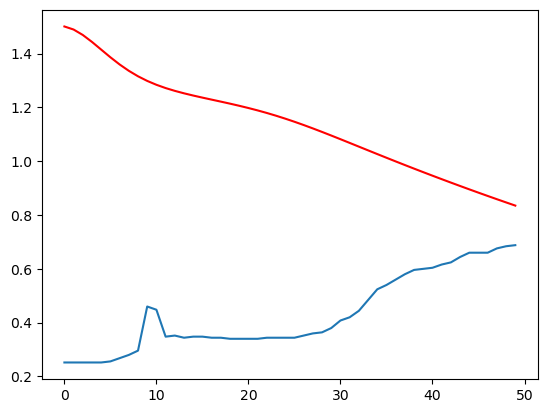

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_lst,'r')
plt.plot(acc_lst)
plt.show()

# New code

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as opt
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions



In [2]:
train_dataset= datasets.MNIST(root='dataset/',train=True,transform=transforms.ToTensor(),download=True)

In [3]:
test_dataset= datasets.MNIST(root='dataset/',train=False,transform=transforms.ToTensor(),download=True)

In [4]:
test_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
trainLoader=DataLoader(dataset=train_dataset,batch_size=16,shuffle=True)
testLoader=DataLoader(dataset=test_dataset,batch_size=16,shuffle=True)

In [6]:
class Mymodel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(784,512),
            nn.ReLU(),
            nn.Linear(512,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.Softmax()
        )

    def forward(self,X):
        return self.net(X)

In [7]:
model=Mymodel()
optim=opt.Adam(model.parameters())
# loss=nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
X_train=train_dataset.train_data
X_train=X_train.reshape(60000,-1)
Y_train=train_dataset.train_labels
X_train=X_train.float()
# Y_train=Y_train.long()


/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [12]:
def accuracy(Y_hat,Y):
    return (torch.argmax(Y_hat,axis=1)==Y).float().mean()


## if you are not using dataloader convert the data into float

In [14]:
accuracy(model(X_train.float()),Y_train)

tensor(0.0948)

In [15]:
# With dataLoader
for epoch in range(2):
    for data, targets in ((trainLoader)):   
        print(data.shape) 
        data = data.reshape(data.shape[0], -1)
        output=model(data)
        print(accuracy(output,targets))
        loss=criterion(output,targets)
        loss.backward()
        print(loss)
        optim.step()
        optim.zero_grad()

torch.Size([16, 1, 28, 28])
tensor(0.1250)
tensor(2.3005, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.0625)
tensor(2.3081, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.2500)
tensor(2.2965, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.)
tensor(2.2989, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1875)
tensor(2.2962, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.2500)
tensor(2.2853, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1875)
tensor(2.2872, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.2500)
tensor(2.2842, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1875)
tensor(2.2804, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1250)
tensor(2.2922, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1875)
tensor(2.2703, grad_fn=<NllLossBackward0>)
torch.Size([16, 1, 28, 28])
tensor(0.1250)
tensor(2.2851, 

In [11]:

for i in range(10):
    output=model(X_train)
    print(accuracy(output,Y_train))
    loss=criterion(output,Y_train)
    loss.backward()
    print(loss)
    optim.step()
    optim.zero_grad()


tensor(0.1044)
tensor(2.3382, grad_fn=<NllLossBackward0>)
tensor(0.2939)
tensor(2.1597, grad_fn=<NllLossBackward0>)
tensor(0.3668)
tensor(2.0889, grad_fn=<NllLossBackward0>)
tensor(0.4072)
tensor(2.0489, grad_fn=<NllLossBackward0>)
tensor(0.4617)
tensor(1.9964, grad_fn=<NllLossBackward0>)
tensor(0.5051)
tensor(1.9534, grad_fn=<NllLossBackward0>)
tensor(0.5106)
tensor(1.9474, grad_fn=<NllLossBackward0>)
tensor(0.5267)
tensor(1.9309, grad_fn=<NllLossBackward0>)
tensor(0.5373)
tensor(1.9203, grad_fn=<NllLossBackward0>)
tensor(0.5391)
tensor(1.9192, grad_fn=<NllLossBackward0>)


In [15]:
accuracy(model(X_train.float()),Y_train)

tensor(0.4905)

In [15]:
X_test=test_dataset.test_data.float()
X_test=X_test.reshape(10000,-1)
Y_test=test_dataset.test_labels

/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [16]:
accuracy(model(X_test),Y_test)

tensor(0.9569)